In [69]:
pip install swat

     |████████████████████████████████| 456 kB 1.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import swat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
%matplotlib inline

In [3]:
t_sne_data=pd.read_csv('csv/t-SNE_data_from_paper.csv')
new_t_sne_data=t_sne_data.rename(columns={'Compound ID': 'full_name_compound'})
new_t_sne_data

,full_name_compound,tSNE-1,tSNE-2
0,BRD-K32273377-001-14-6,-0.369542,9.718216
1,BRD-K51207550-001-20-6,-0.902436,17.167963
2,BRD-K14116214-001-07-0,-0.790806,-10.659140
3,BRD-A60177051-001-01-6,-2.159382,-6.720759
4,BRD-K87492696-001-14-0,0.283137,7.094828
...,...,...,...
2910,BRD-K95785537-001-21-5,0.765038,1.258732
2911,BRD-K49657628-001-12-2,0.100436,9.362219
2912,BRD-K76064317-001-06-5,1.534748,15.552460
2913,BRD-A89175223-051-12-2,0.999264,3.791481


In [4]:
display(t_sne_data.shape)

(2915, 3)

In [5]:
compound_target=pd.read_csv('csv/combined_info_for_known_target_inhibitor_pair_from_paper.csv')
compound_target

,Unnamed: 0,compound_stem,SMILES,compound_name,pubchem_cid,kegg_kid,classifier_target,similar_to,full_name_compound,concentration,strain,n_replicates,log_fold_change,std_error_lfc,log2_fold_change,std_error_l2fc,z_score,p_value
0,22746,A08545410,C[C@@H]1[C@H]2[C@H](O)[C@H]3[C@H](N(C)C)C(=O)C...,doxycycline,54416523.0,NaN,30S ribosome 16S rRNA decoding,NaN,BRD-A08545410-003-05-2,1.0,aceE,8,0.264362,0.095292,0.381394,0.137477,2.774240,5.544629e-03
1,22747,A08545410,C[C@@H]1[C@H]2[C@H](O)[C@H]3[C@H](N(C)C)C(=O)C...,doxycycline,54416523.0,NaN,30S ribosome 16S rRNA decoding,NaN,BRD-A08545410-003-05-2,30.0,aceE,8,-1.037512,0.096712,-1.496813,0.139526,-10.727815,1.097139e-26
2,22748,A08545410,C[C@@H]1[C@H]2[C@H](O)[C@H]3[C@H](N(C)C)C(=O)C...,doxycycline,54416523.0,NaN,30S ribosome 16S rRNA decoding,NaN,BRD-A08545410-003-05-2,3.0,aceE,8,-0.032453,0.095467,-0.046819,0.137730,-0.339935,7.339134e-01
3,22749,A08545410,C[C@@H]1[C@H]2[C@H](O)[C@H]3[C@H](N(C)C)C(=O)C...,doxycycline,54416523.0,NaN,30S ribosome 16S rRNA decoding,NaN,BRD-A08545410-003-05-2,10.0,aceE,8,-0.093378,0.095537,-0.134716,0.137831,-0.977399,3.283984e-01
4,22750,A08545410,C[C@@H]1[C@H]2[C@H](O)[C@H]3[C@H](N(C)C)C(=O)C...,doxycycline,54416523.0,NaN,30S ribosome 16S rRNA decoding,NaN,BRD-A08545410-003-05-2,1.0,adoK,8,0.555926,0.077402,0.802032,0.111667,7.182354,7.403580e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39469,1310899,U78772829,C1[C@@H]([C@H]([C@@H]([C@H]([C@@H]1NC(=O)[C@H]...,amikacin hydrate,16218899.0,NaN,30S ribosome 16S rRNA decoding,NaN,BRD-U78772829-000-01-3,10.0,trpG,8,0.296634,0.103410,0.427952,0.149189,2.868526,4.133597e-03
39470,1310900,U78772829,C1[C@@H]([C@H]([C@@H]([C@H]([C@@H]1NC(=O)[C@H]...,amikacin hydrate,16218899.0,NaN,30S ribosome 16S rRNA decoding,NaN,BRD-U78772829-000-01-3,1.0,trpS,8,0.501194,0.150708,0.723070,0.217426,3.325596,8.858710e-04
39471,1310901,U78772829,C1[C@@H]([C@H]([C@@H]([C@H]([C@@H]1NC(=O)[C@H]...,amikacin hydrate,16218899.0,NaN,30S ribosome 16S rRNA decoding,NaN,BRD-U78772829-000-01-3,30.0,trpS,8,0.450464,0.151038,0.649883,0.217901,2.982462,2.867158e-03
39472,1310902,U78772829,C1[C@@H]([C@H]([C@@H]([C@H]([C@@H]1NC(=O)[C@H]...,amikacin hydrate,16218899.0,NaN,30S ribosome 16S rRNA decoding,NaN,BRD-U78772829-000-01-3,3.0,trpS,8,0.504390,0.150699,0.727681,0.217412,3.347014,8.202603e-04


In [6]:
reduced_compound_target=compound_target.loc[:,['compound_name','full_name_compound','classifier_target']]
new_reduced_compound_target=reduced_compound_target.drop_duplicates()
new_reduced_compound_target

,compound_name,full_name_compound,classifier_target
0,doxycycline,BRD-A08545410-003-05-2,30S ribosome 16S rRNA decoding
408,ibuprofen,BRD-A17655518-001-20-2,infB
816,"Merrem, Meronem, Meropenem",BRD-A18115130-001-01-4,penicillin binding protein
1224,Oxytetracycline,BRD-A22740840-001-07-1,30S ribosome 16S rRNA decoding
1228,Oxytetracycline,BRD-A22740840-335-05-7,30S ribosome 16S rRNA decoding
...,...,...,...
37434,oxacillin,BRD-K96786677-323-01-2,penicillin binding protein
37842,netilmicin sulfate,BRD-M53946149-343-01-9,30S ribosome 16S rRNA decoding
38250,PAS,BRD-M65097687-001-16-7,thymidylate synthase
38658,bacitracin zinc,BRD-M97113494-001-01-9,cell membrane


In [7]:
left=new_reduced_compound_target.set_index(['full_name_compound'])
right=new_t_sne_data.set_index(['full_name_compound'])
full=right.join(left)
full.to_csv('csv/full_name_compound_tSNE1_tSNE2_target.csv')

In [8]:
DNA_gyrase=full.loc[full.classifier_target=='DNA gyrase']
DNA_gyrase

,tSNE-1,tSNE-2,compound_name,classifier_target
full_name_compound,,,,
BRD-A74980173-001-10-1,2.945656,-19.427996,Gatifloxacin,DNA gyrase
BRD-K11196887-001-19-6,-2.048940,-16.016527,norfloxacin,DNA gyrase
BRD-K76534306-001-19-3,1.309060,-19.030443,Enrofloxacin,DNA gyrase
BRD-A93964801-001-13-6,2.435365,-19.117079,CLINAFLOXACIN,DNA gyrase
BRD-K66615216-001-01-9,2.994373,-19.360070,moxifloxacin,DNA gyrase
BRD-K08525451-003-04-5,-2.240831,-15.895746,Sarafloxacin,DNA gyrase
BRD-A75850590-003-08-0,-2.121088,-16.378923,lomefloxacin,DNA gyrase
BRD-K55034111-066-15-5,-1.746167,-16.552418,Pefloxacin,DNA gyrase
BRD-A24397426-001-08-8,1.387824,-19.010340,nadifloxacin,DNA gyrase


In [9]:
DHPS=full.loc[full.classifier_target=='dihydropteroate synthase']
DHPS

,tSNE-1,tSNE-2,compound_name,classifier_target
full_name_compound,,,,
BRD-K32273377-001-14-6,-0.369542,9.718216,sulfadiazine,dihydropteroate synthase
BRD-K14116214-001-07-0,-0.790806,-10.659140,sulfamonomethoxine,dihydropteroate synthase
BRD-K87492696-001-14-0,0.283137,7.094828,sulfameter,dihydropteroate synthase
BRD-K14705039-001-14-9,-4.876038,11.132812,sulfathiazole,dihydropteroate synthase
BRD-K28494619-001-23-3,0.981466,7.487319,sulfamethoxazole,dihydropteroate synthase
BRD-K71125014-001-24-8,0.729280,13.903707,sulfadimethoxine,dihydropteroate synthase
BRD-K31682896-001-21-6,2.086090,16.935910,sulfamethizole,dihydropteroate synthase
BRD-K50859149-001-16-1,-2.773009,7.022830,sulfisoxazole,dihydropteroate synthase
BRD-K55250441-001-11-4,-2.499366,6.252131,SULFADOXINE,dihydropteroate synthase


In [10]:
_50S_ribosome=full.loc[full.classifier_target=='50S ribosome 23S rRNA translocation']
_50S_ribosome

,tSNE-1,tSNE-2,compound_name,classifier_target
full_name_compound,,,,
BRD-A60177051-001-01-6,-2.159382,-6.720759,Erythromycin,50S ribosome 23S rRNA translocation
BRD-K49668410-001-15-4,2.703806,-11.834887,clarithromycin,50S ribosome 23S rRNA translocation
BRD-A78049876-003-01-6,-4.482302,-4.847901,clindamycin,50S ribosome 23S rRNA translocation
BRD-K51677086-001-11-2,-2.114465,-6.792958,erythromycin ethylsuccinate,50S ribosome 23S rRNA translocation
BRD-K37753391-046-01-6,-1.752040,-6.489774,Tylosin,50S ribosome 23S rRNA translocation


In [11]:
_5_FU=full.loc[full.classifier_target=='5-FU']
_5_FU

,tSNE-1,tSNE-2,compound_name,classifier_target
full_name_compound,,,,
BRD-K11630072-001-10-8,1.558112,-14.513164,carmofur,5-FU
BRD-K24844714-001-20-3,-2.362966,-14.144470,5-Fluorouracil,5-FU


In [12]:
inhA=full.loc[full.classifier_target=='inhA']
inhA

,tSNE-1,tSNE-2,compound_name,classifier_target
full_name_compound,,,,
BRD-K51207550-001-20-6,-0.902436,17.167963,ethionamide,inhA
BRD-K87202646-001-28-4,3.117346,-18.398433,isoniazid,inhA


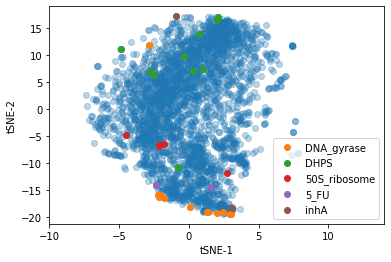

In [13]:
X=t_sne_data['tSNE-1']
y=t_sne_data['tSNE-2']
plt.scatter(X,y,alpha=0.3)

plt.scatter(DNA_gyrase['tSNE-1'], DNA_gyrase['tSNE-2'],label='DNA_gyrase')

plt.scatter(DHPS['tSNE-1'], DHPS['tSNE-2'],label='DHPS')
plt.scatter(_50S_ribosome['tSNE-1'], _50S_ribosome['tSNE-2'],label='50S_ribosome')
plt.scatter(_5_FU['tSNE-1'], _5_FU['tSNE-2'],label='5_FU')
plt.scatter(inhA['tSNE-1'], inhA['tSNE-2'],label='inhA')
  
plt.xlim((-10, 14)) 
plt.legend()

plt.xlabel('tSNE-1')
plt.ylabel('tSNE-2')
plt.savefig('picture/tSNE_reproduce.png')